In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("E:\\Feature engineering\\Datasets\\titanic.csv")

In [3]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df = df[['Age','Fare','Survived']]

In [5]:
df.isnull().sum()

Age         86
Fare         1
Survived     0
dtype: int64

In [6]:
## Random sample imputation can be done only if the data is following MCAR concepts 

In [7]:
s = df['Age'].dropna().sample(df['Age'].isnull().sum() , random_state = 42)

In [8]:
s.index

Int64Index([ 27, 398,  89, 241,  68, 207, 354, 224, 262, 245,  92,   9, 399,
            157, 345, 165, 142, 182,  94, 250, 137, 172, 372, 247,   5, 138,
            330, 403, 204, 402, 209, 378,  74, 103, 295, 232, 228, 363,  55,
            147,  38,  50, 291, 226, 141,  87, 222,  53, 126, 392, 117, 293,
            254,  17, 136, 316,   7,  66, 184, 284, 374, 370, 328,   3,  95,
            309,  71, 283,  96, 333,  18,  26, 318, 405, 337, 221, 100, 139,
            179, 307, 144, 176, 220, 112, 393, 397],
           dtype='int64')

In [9]:
## we need to replace the values 

In [10]:
s.index

Int64Index([ 27, 398,  89, 241,  68, 207, 354, 224, 262, 245,  92,   9, 399,
            157, 345, 165, 142, 182,  94, 250, 137, 172, 372, 247,   5, 138,
            330, 403, 204, 402, 209, 378,  74, 103, 295, 232, 228, 363,  55,
            147,  38,  50, 291, 226, 141,  87, 222,  53, 126, 392, 117, 293,
            254,  17, 136, 316,   7,  66, 184, 284, 374, 370, 328,   3,  95,
            309,  71, 283,  96, 333,  18,  26, 318, 405, 337, 221, 100, 139,
            179, 307, 144, 176, 220, 112, 393, 397],
           dtype='int64')

In [11]:
df['Age'][10]

nan

In [12]:
df[df['Age'].isnull()].index

Int64Index([ 10,  22,  29,  33,  36,  39,  41,  47,  54,  58,  65,  76,  83,
             84,  85,  88,  91,  93, 102, 107, 108, 111, 116, 121, 124, 127,
            132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191,
            199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255,
            256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290,
            292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366,
            380, 382, 384, 408, 410, 413, 416, 417],
           dtype='int64')

In [13]:
x = df[df['Age'].isnull()].head(1)
x

,Age,Fare,Survived
10,NaN,7.8958,0


In [14]:
def random(df , variable):
    df[variable+"_replaced"] = df[variable].copy()
    s = df['Age'].dropna().sample(df['Age'].isnull().sum() , random_state = 42)
    s.index = df[df['Age'].isnull()].index
    df.loc[df['Age'].isnull() , 'Age_replaced'] = s
    
    
    

In [15]:
random(df,'Age')

In [16]:
df.isnull().sum()

Age             86
Fare             1
Survived         0
Age_replaced     0
dtype: int64

<AxesSubplot:>

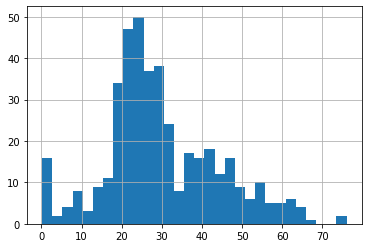

In [17]:
df['Age_replaced'].hist(bins = 30)

### K-means Discretisation


In [18]:
from sklearn.preprocessing import KBinsDiscretizer

In [19]:
reg = KBinsDiscretizer(n_bins=5, encode='ordinal',strategy='kmeans' )

In [20]:
reg.fit(df['Age_replaced'].values.reshape(-1,1))

KBinsDiscretizer(encode='ordinal', strategy='kmeans')

In [21]:
reg.bin_edges_

array([array([ 0.17      , 15.16955453, 30.02490252, 42.5132626 , 55.42128936,
       76.        ])], dtype=object)

In [22]:
df['Age_kmeans_replaced'] = reg.transform(df['Age_replaced'].values.reshape(-1,1))

In [23]:
df.head()

,Age,Fare,Survived,Age_replaced,Age_kmeans_replaced
0,34.5,7.8292,0,34.5,2.0
1,47.0,7.0000,1,47.0,3.0
2,62.0,9.6875,0,62.0,4.0
3,27.0,8.6625,0,27.0,1.0
4,22.0,12.2875,1,22.0,1.0


In [26]:
df['Age_kmeans_replaced'].unique()

array([2., 3., 4., 1., 0.])

<AxesSubplot:>

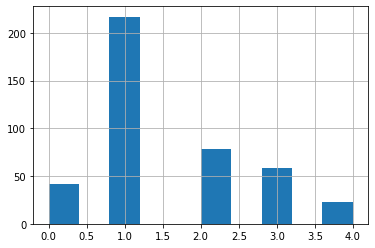

In [27]:
df['Age_kmeans_replaced'].hist()

<AxesSubplot:xlabel='Age_kmeans_replaced'>

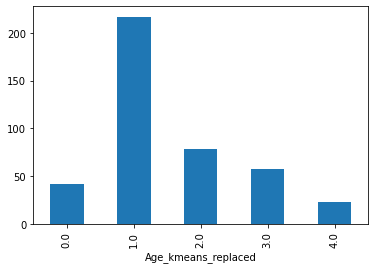

In [28]:
df.groupby(df['Age_kmeans_replaced'])['Age_kmeans_replaced'].count().plot.bar()